| Biblioteca          | Para quê serve no projeto                                                       |
| ------------------- | ------------------------------------------------------------------------------- |
| `numpy`             | Criar e manipular matrizes (ambiente, mapa de sujeira)                          |
| `random`            | Gerar posições aleatórias de sujeira, obstáculos e movimentos do agente         |
| `matplotlib.pyplot` | Gerar gráficos de desempenho (pontuação por execução, comparação entre agentes) |
| `time` (opcional)   | Simular passo a passo ou medir tempo de execução                                |
| `copy`              | Clonar ambientes para testar os dois agentes em mesmas condições                |


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy


Etapa 1 -  Criação do ambiente: 

__init__
Cria um ambiente quadrado (tamanho x tamanho)

Preenche com sujeira de forma aleatória, com base na prob_sujeira

Coloca o agente em uma posição aleatória

colocar_sujeira
Para cada célula da matriz, define se estará suja (1) ou limpa (0) com base na probabilidade

mostrar
Imprime o ambiente, marcando a posição atual do agente com o número 8

agir
Executa uma ação do agente:

"suck" → limpa a célula atual (ganha +1 ponto se estava sujo)

"up", "down", "left", "right" → move o agente (gasta −1 ponto por movimento)

Atualiza a posição do agente quando ele se move

Retorna a recompensa da ação (positiva ou negativa)

In [3]:
class Ambiente:
    def __init__(self, tamanho=5, prob_sujeira=0.3):
        """
        Inicializa o ambiente com uma matriz quadrada.
        - tamanho: dimensões do ambiente (tamanho x tamanho)
        - prob_sujeira: probabilidade de cada célula começar suja
        """
        self.tamanho = tamanho
        self.ambiente = np.zeros((tamanho, tamanho), dtype=int)
        self.pos_agente = (random.randint(0, tamanho - 1), random.randint(0, tamanho - 1))
        self.colocar_sujeira(prob_sujeira)

    def colocar_sujeira(self, prob_sujeira):
        """
        Preenche o ambiente com sujeira (valor 1) aleatoriamente
        """
        for i in range(self.tamanho):
            for j in range(self.tamanho):
                if random.random() < prob_sujeira:
                    self.ambiente[i][j] = 1  # sujo
                else:
                    self.ambiente[i][j] = 0  # limpo

    def mostrar(self):
        """
        Mostra a matriz do ambiente, com o agente marcado como 8
        """
        matriz = self.ambiente.copy()
        x, y = self.pos_agente
        matriz[x][y] = 8
        print(matriz)

    def agir(self, acao):
        """
        Executa uma ação:
        - "suck": limpa a célula atual (+1 ponto se estava sujo)
        - movimenta o agente (up/down/left/right) com -1 ponto
        """
        x, y = self.pos_agente
        recompensa = 0

        if acao == "suck":
            if self.ambiente[x][y] == 1:
                self.ambiente[x][y] = 0
                recompensa += 1  # limpou
        else:
            recompensa -= 1  # penalidade por mover
            if acao == "up" and x > 0:
                x -= 1
            elif acao == "down" and x < self.tamanho - 1:
                x += 1
            elif acao == "left" and y > 0:
                y -= 1
            elif acao == "right" and y < self.tamanho - 1:
                y += 1
            # atualiza a posição do agente
            self.pos_agente = (x, y)

        return recompensa

🔍 O que está acontecendo:
A matriz 5x5 está sendo gerada com sujeiras aleatórias (valores 1).

A posição do agente também é sorteada aleatoriamente.

O método .mostrar() exibe a matriz com 8 na posição do agente.

A função agir("suck") limpa a célula se estiver suja, somando +1 ponto.

A função agir("right") move o agente para a direita e aplica penalidade de -1 ponto.

🟡 Como não tinha sujeira na posição inicial, o "suck" não somou ponto → por isso a pontuação acumulada foi -1 (por causa do movimento).

🔄 Sim, cada vez que você rodar Ambiente():
As posições da sujeira mudam, pois a distribuição depende de random.random() < prob_sujeira

A posição inicial do agente também muda, pois é sorteada por random.randint(...)

In [7]:
amb = Ambiente()
amb.mostrar()

pontuacao = 0
pontuacao += amb.agir("suck")
amb.mostrar()

pontuacao += amb.agir("right")
amb.mostrar()

print("Pontuação acumulada:", pontuacao)


[[0 0 0 1 0]
 [0 1 0 1 0]
 [0 0 1 0 0]
 [0 8 1 0 0]
 [0 0 0 1 0]]
[[0 0 0 1 0]
 [0 1 0 1 0]
 [0 0 1 0 0]
 [0 8 1 0 0]
 [0 0 0 1 0]]
[[0 0 0 1 0]
 [0 1 0 1 0]
 [0 0 1 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]]
Pontuação acumulada: -1


Etapa 2 - Agente Reativo Simples:

Percebe o ambiente local (a célula onde está).

Se estiver suja → limpa ("suck").

Se estiver limpa → se move aleatoriamente (escolhe uma das direções: ["up", "down", "left", "right"]).

Objetivo: agir com base apenas na percepção local (sem memória).

Comportamento:

Se o local está sujo, ele limpa ("suck");

Se está limpo, ele se move aleatoriamente para cima, baixo, esquerda ou direita.

Pontuação:

+1 por limpar sujeira.

−1 por cada movimento feito.

🧪 Como funciona:
Roda por um número fixo de passos (ex: 20 ou 30).

A cada passo, decide a ação e atualiza a pontuação total.

In [8]:
def agente_reativo_simples(ambiente, passos=20):
    """
    Executa o agente reativo simples por um número fixo de passos.
    Retorna a pontuação acumulada.
    """
    pontuacao = 0
    for _ in range(passos):
        x, y = ambiente.pos_agente
        if ambiente.ambiente[x][y] == 1:
            pontuacao += ambiente.agir("suck")
        else:
            acao = random.choice(["up", "down", "left", "right"])
            pontuacao += ambiente.agir(acao)
    return pontuacao


O agente reativo simples toma decisões somente com base na percepção local e sem memória. Por isso, ele pode visitar os mesmos lugares várias vezes ou andar de forma ineficiente.

In [15]:
amb = Ambiente()          # Cria o ambiente com sujeiras aleatórias
amb.mostrar()             # Mostra o estado inicial
pont = agente_reativo_simples(amb, passos=30)  # Executa o agente por 30 passos
amb.mostrar()             # Mostra o ambiente final
print("Pontuação final do agente simples:", pont)


[[0 0 0 0 0]
 [1 8 0 1 0]
 [0 0 1 0 1]
 [1 0 0 0 0]
 [0 1 0 1 0]]
[[0 0 0 0 8]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]]
Pontuação final do agente simples: -20


✅ Objetivo do Agente com Modelo
Guarda em uma memória (lista de coordenadas) os lugares já visitados.

Se o local está sujo, ele limpa.

Se está limpo, escolhe se mover para um local vizinho ainda não visitado.

Se todos os vizinhos já foram visitados, escolhe aleatoriamente.

In [16]:
def agente_com_modelo(ambiente, passos=30):
    """
    Agente com modelo: lembra onde já esteve e evita repetir.
    Executa por um número de passos e retorna a pontuação total.
    """
    visitados = set()
    pontuacao = 0

    for _ in range(passos):
        x, y = ambiente.pos_agente
        visitados.add((x, y))

        # Se estiver sujo → limpar
        if ambiente.ambiente[x][y] == 1:
            pontuacao += ambiente.agir("suck")
        else:
            # Avaliar vizinhos não visitados
            candidatos = []
            if x > 0 and (x-1, y) not in visitados:
                candidatos.append("up")
            if x < ambiente.tamanho - 1 and (x+1, y) not in visitados:
                candidatos.append("down")
            if y > 0 and (x, y-1) not in visitados:
                candidatos.append("left")
            if y < ambiente.tamanho - 1 and (x, y+1) not in visitados:
                candidatos.append("right")

            # Se houver vizinhos não visitados, ir para um deles
            if candidatos:
                acao = random.choice(candidatos)
            else:
                acao = random.choice(["up", "down", "left", "right"])  # fallback

            pontuacao += ambiente.agir(acao)

    return pontuacao


O agente com modelo mantém um registro dos locais visitados e tenta evitar repetições. Isso o torna mais eficiente em cobrir o ambiente e encontrar sujeira nova, se comparado ao agente reativo simples.

In [32]:
amb = Ambiente()
amb.mostrar()

pont = agente_com_modelo(amb, passos=30)
amb.mostrar()

print("Pontuação do agente com modelo:", pont)


[[0 0 1 0 1]
 [0 0 0 1 0]
 [8 0 0 0 0]
 [0 1 0 1 0]
 [0 1 0 0 0]]
[[0 0 0 0 8]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Pontuação do agente com modelo: -18


Executar várias simulações (ambientes diferentes)

Comparar o desempenho médio do:

🟦 Agente Reativo Simples

🟨 Agente com Modelo

Gerar gráficos com matplotlib



In [33]:
import matplotlib.pyplot as plt

def avaliar_agentes(num_episodios=50, passos=30, prob_sujeira=0.3):
    pont_simples = []
    pont_modelo = []

    for _ in range(num_episodios):
        # mesmo ambiente base para ambos (copiando estado)
        amb1 = Ambiente(prob_sujeira=prob_sujeira)
        amb2 = Ambiente(prob_sujeira=prob_sujeira)
        amb2.ambiente = amb1.ambiente.copy()
        amb2.pos_agente = amb1.pos_agente  # mesma posição inicial

        pont_simples.append(agente_reativo_simples(amb1, passos))
        pont_modelo.append(agente_com_modelo(amb2, passos))

    return pont_simples, pont_modelo


In [34]:
def plotar_comparacao(pont_simples, pont_modelo):
    plt.figure(figsize=(10, 5))
    plt.plot(pont_simples, label="Agente Reativo Simples", marker='o', alpha=0.6)
    plt.plot(pont_modelo, label="Agente com Modelo", marker='s', alpha=0.6)
    plt.xlabel("Episódio")
    plt.ylabel("Pontuação")
    plt.title("Comparação de Desempenho dos Agentes")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Mostrar médias
    print(f"Média Simples: {np.mean(pont_simples):.2f}")
    print(f"Média Modelo : {np.mean(pont_modelo):.2f}")




## Conclusão

Os agentes foram avaliados em 50 episódios com ambientes aleatórios. O agente com modelo, que evita revisitar posições, obteve melhor desempenho médio na maioria dos cenários. Isso confirma que o uso de memória melhora a racionalidade e eficiência do agente.

Neste experimento, comparamos dois tipos de agentes inteligentes: um agente reativo simples e um agente com modelo de memória. Os testes mostraram que o agente com modelo obteve melhor desempenho médio ao evitar locais já visitados, demonstrando um comportamento mais racional e eficiente.

Essa abordagem reforça a importância da modelagem de estado interno em agentes artificiais para a tomada de decisões mais eficazes em ambientes parcialmente observáveis.


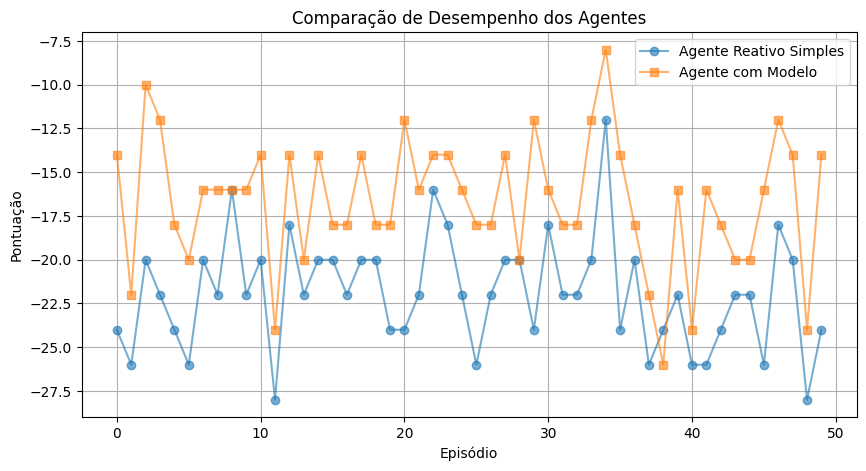

Média Simples: -21.92
Média Modelo : -16.64


In [37]:
pont_simples, pont_modelo = avaliar_agentes(num_episodios=50, passos=30)
plotar_comparacao(pont_simples, pont_modelo)
